In [31]:
library('Seurat')
library('tidyverse')

In [32]:
# https://www.10xgenomics.com/datasets/20-k-mixture-of-nsclc-dt-cs-from-7-donors-3-v-3-1-3-1-standard-6-1-0

In [33]:
nsclc_m <- Read10X_h5("C:/Users/nidhi/Documents/scRNAseq/20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [34]:
str(nsclc_m)

List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:75593104] 184 7502 9727 10485 13480 21902 24894 25667 28658 31547 ...
  .. ..@ p       : int [1:3862364] 0 0 0 12 14 14 21 21 25 25 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:75593104] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "

In [35]:
counts <- nsclc_m$`Gene Expression`
counts[0:5,0:3]

5 x 3 sparse Matrix of class "dgCMatrix"
            AAACCCAAGAAACACT-1 AAACCCAAGAAACCAT-1 AAACCCAAGAAACCCA-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .

In [36]:
nsclc.sobj <- CreateSeuratObject(counts = counts, project="nsclc_test",min.cells=3,min.features=200)
str(nsclc.sobj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:63710619] 59 64 76 77 89 98 142 204 270 312 ...
  .. .. .. .. .. .. ..@ p       : int [1:42082] 0 789 1040 1401 1649 1950 8346 12231 12456 12884 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 42081
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:63710619] 1 2 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:42081, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ 

In [55]:
##### QC of raw counts #####
### 1. % MT ###

In [56]:
nsclc.sobj[["mt_percent"]] <- PercentageFeatureSet(nsclc.sobj, pattern="^MT-")
View(nsclc.sobj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,mt_percent
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAGATTCA-1,nsclc_test,295,251,4.4067797
AAACCCAAGATTGACA-1,nsclc_test,470,361,2.1276596
AAACCCAAGCAAATCA-1,nsclc_test,296,248,2.3648649
AAACCCAAGCAATTCC-1,nsclc_test,364,301,2.4725275
AAACCCAAGCCGTTGC-1,nsclc_test,260,225,1.9230769
AAACCCAAGCCTCTCT-1,nsclc_test,263,215,1.5209125
AAACCCAAGCGGTAAC-1,nsclc_test,274,237,2.9197080
AAACCCAAGGCTCCCA-1,nsclc_test,325,267,2.1538462
AAACCCAAGGTCACTT-1,nsclc_test,344,292,2.3255814


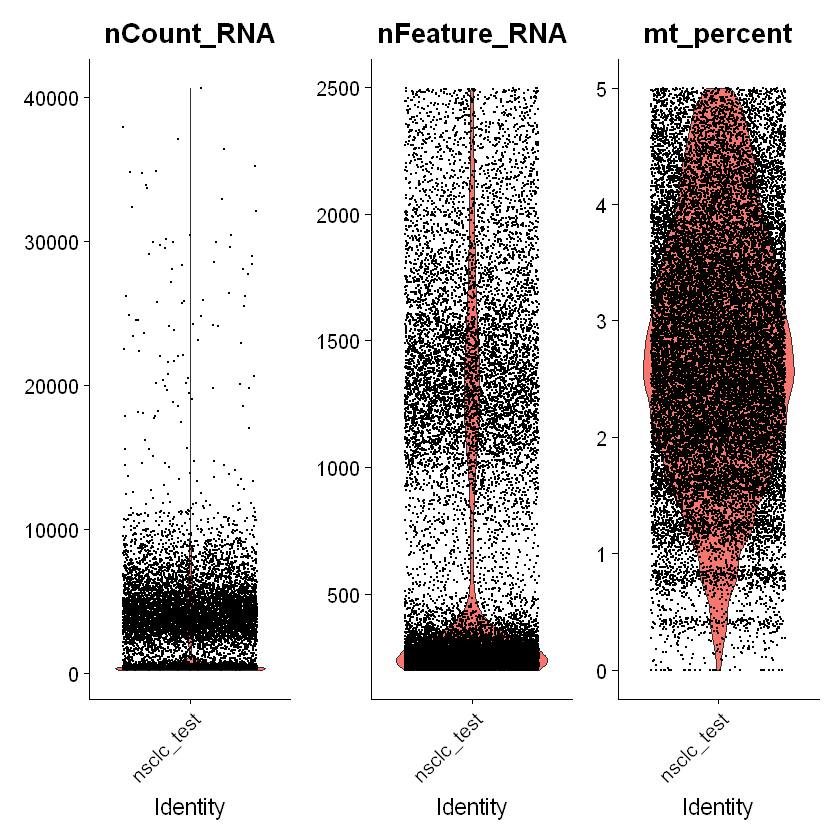

In [57]:
VlnPlot(nsclc.sobj,features=c("nCount_RNA", "nFeature_RNA", "mt_percent"), ncol=3)

In [58]:
# A lot of cells with large num of molecules detected
# A lot of cells with large high %mt count

`geom_smooth()` using formula = 'y ~ x'


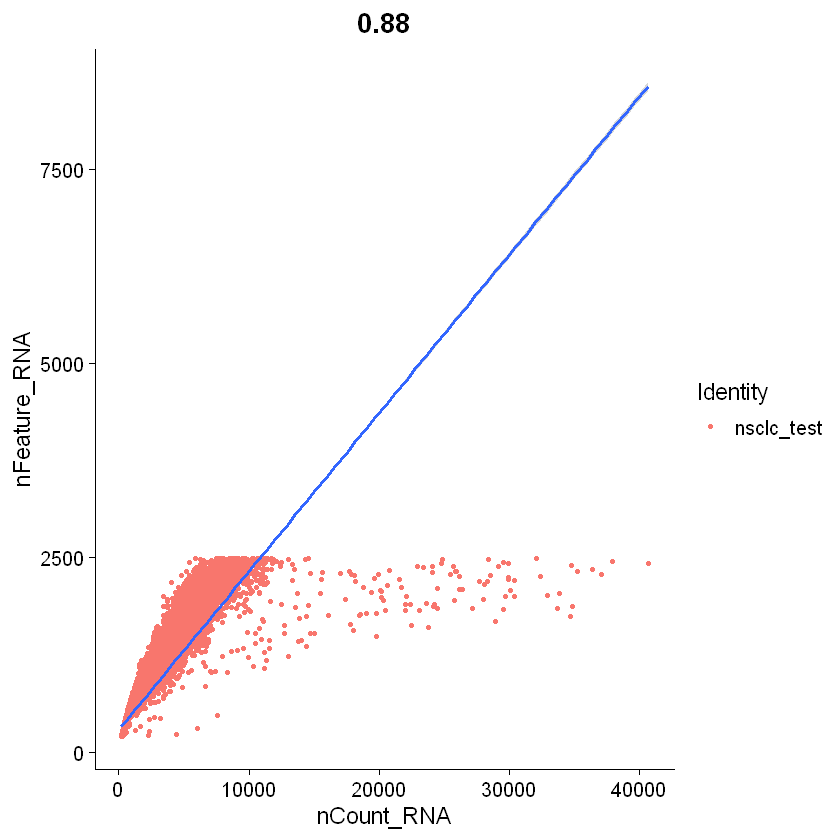

In [59]:
FeatureScatter(nsclc.sobj, feature1="nCount_RNA", feature2="nFeature_RNA") + geom_smooth(method='lm')

In [60]:
# good quality cells should have high number of genes AND high number of moleculesor counts
# Lower right corner: captured a few number of genes, sequenced over and over again so has high transcript count
# Top left corner: High number of genes captured but not deeply sequenced

In [63]:
### 2. Filtering ###

In [64]:
# Subset seurat obj 
nsclc.sobj
nsclc.sobj <- subset(nsclc.sobj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & mt_percent < 5 )
nsclc.sobj

An object of class Seurat 
29552 features across 24708 samples within 1 assay 
Active assay: RNA (29552 features, 2000 variable features)
 2 layers present: counts, data

An object of class Seurat 
29552 features across 24708 samples within 1 assay 
Active assay: RNA (29552 features, 2000 variable features)
 2 layers present: counts, data

In [65]:
### 3. Normalization ###

In [66]:
nsclc.sobj <- NormalizeData(nsclc.sobj, normalization.method = "LogNormalize", scale.factor = 10000) # default values
str(nsclc.sobj@commands)

Normalizing layer: counts



List of 2
 $ FindVariableFeatures.RNA:Formal class 'SeuratCommand' [package "SeuratObject"] with 5 slots
  .. ..@ name       : chr "FindVariableFeatures.RNA"
  .. ..@ time.stamp : POSIXct[1:1], format: "2024-09-10 22:49:07"
  .. ..@ assay.used : chr "RNA"
  .. ..@ call.string: chr [1:2] "FindVariableFeatures(nsclc.sobj, selection.method = \"vst\", " "    nfeatures = 2000)"
  .. ..@ params     :List of 12
  .. .. ..$ assay              : chr "RNA"
  .. .. ..$ selection.method   : chr "vst"
  .. .. ..$ loess.span         : num 0.3
  .. .. ..$ clip.max           : chr "auto"
  .. .. ..$ mean.function      :function (mat, display_progress)  
  .. .. ..$ dispersion.function:function (mat, display_progress)  
  .. .. ..$ num.bin            : num 20
  .. .. ..$ binning.method     : chr "equal_width"
  .. .. ..$ nfeatures          : num 2000
  .. .. ..$ mean.cutoff        : num [1:2] 0.1 8
  .. .. ..$ dispersion.cutoff  : num [1:2] 1 Inf
  .. .. ..$ verbose            : logi TRUE
 $ NormalizeD

In [67]:
### 4. Feature selection ###
# Idenify cells with high cell to cell variation

In [68]:
nsclc.sobj <- FindVariableFeatures( nsclc.sobj, selection.method = "vst", nfeatures = 2000)  # default values

Finding variable features for layer counts



In [48]:
# top 10 most variable genes
top10 <- head(VariableFeatures( nsclc.sobj), 10)
top10

[1] "IGHG1"  "IGKC"   "IGHA1"  "IGHG3"  "IGLC2"  "TPSB2"  "TPSAB1" "IGHM"  
 [9] "JCHAIN" "IGHGP"

In [70]:
# Plot variable features

Warning message:
"Transformation introduced infinite values in continuous x-axis"


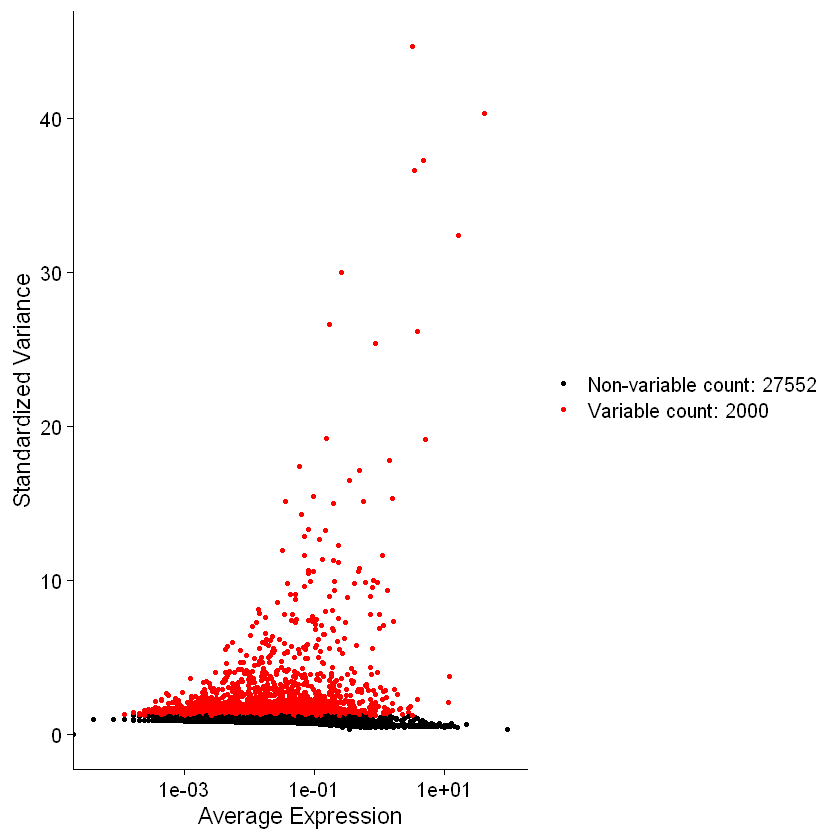

In [71]:
plot1 <- VariableFeaturePlot(nsclc.sobj)
plot1

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"


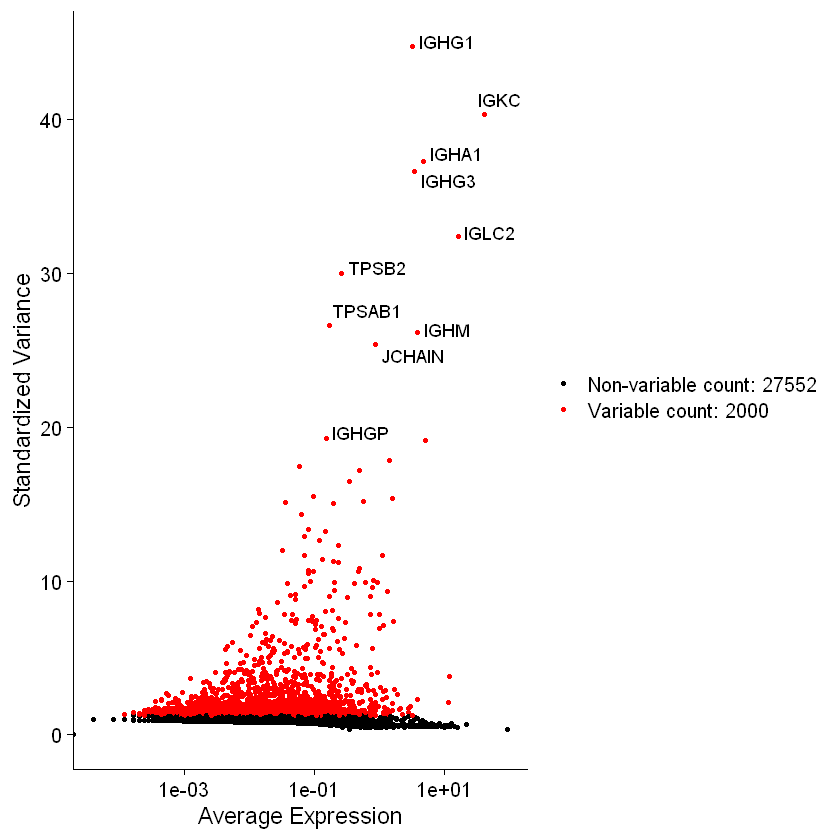

In [72]:
LabelPoints(plot = plot1, points = top10, repel = TRUE)

In [73]:
### 5. Scaling ###
### 6. Linear dimensionality reduction ###